<a href="https://colab.research.google.com/github/mohamedamr13/gmc/blob/main/Logistical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
df = pd.read_csv('titanic-passengers.csv' , sep = ';')

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
nums = { 'Survived' : {  "Yes" : 1 , "No" : 0 } }
df.replace( nums , inplace = True )

In [27]:
x = df[['Fare', 'Age','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

In [22]:
df['Age'].isnull().sum()
# df['Age'].fillna( df['Age'].mean() , inplace = True  )
df['Cabin'].isnull().sum()
df['Cabin'].fillna( df['Cabin'].mode() , inplace = True  )



In [28]:

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.70


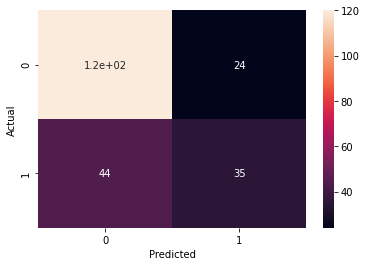

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

A ROC / AUC Graph shows the performance of a model by plotting the TPR vs the FPR rate. Since the TPR and FPR are essentially determined by the threshold that defines what is positive( meaning that after this threshold , data points will be considered positive ) , the ROC / AUC draws the TPR / FPR rate for several threshold values 

If the rate is 1 that means that the model has predicted all actual positives ; if it is 0 that means that the model's positive predictions were all false. 

So  there is an infinte number of thresholds that will produce an inifine set of TPR / FPR rates , so how does the graph signify the performance of a model ?

This is where the AUC comes in. By measuring the Area-Under-the-Curve through performing smth like a Riemann sum of a discrete set of TPR/FPR rates associated with a discrete set of threshold , the graph shows the perfomance of the model by plotting the overall AUC under the curve and comparing it to the ideal case where the rate is always 1  



In [32]:
pred_prob = logreg.predict_proba(x_test)
pred_prob

array([[0.28119752, 0.71880248],
       [0.57181966, 0.42818034],
       [0.23620951, 0.76379049],
       [0.51051833, 0.48948167],
       [0.25879544, 0.74120456],
       [0.32133784, 0.67866216],
       [0.78427711, 0.21572289],
       [0.76384783, 0.23615217],
       [0.41095877, 0.58904123],
       [0.29134987, 0.70865013],
       [0.59442502, 0.40557498],
       [0.29825644, 0.70174356],
       [0.63615272, 0.36384728],
       [0.30198499, 0.69801501],
       [0.30005742, 0.69994258],
       [0.78446834, 0.21553166],
       [0.68654571, 0.31345429],
       [0.79676266, 0.20323734],
       [0.45787948, 0.54212052],
       [0.76511447, 0.23488553],
       [0.78165622, 0.21834378],
       [0.73400122, 0.26599878],
       [0.71389775, 0.28610225],
       [0.43439254, 0.56560746],
       [0.53612607, 0.46387393],
       [0.49337196, 0.50662804],
       [0.78492039, 0.21507961],
       [0.76950793, 0.23049207],
       [0.784386  , 0.215614  ],
       [0.78427711, 0.21572289],
       [0.

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)



In [34]:
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
auc_score1

0.6718530239099859

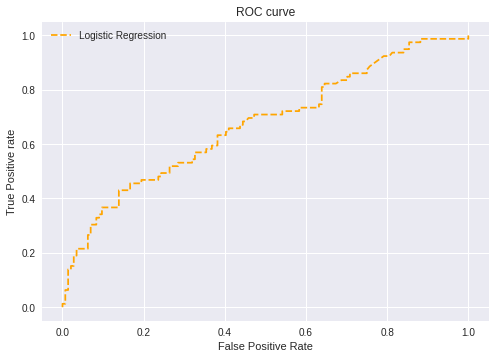

In [39]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()
